In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from uncertainties import *


In [2]:
Temperatures=pd.read_csv("Measure_data.csv")
Electric_energy=pd.read_csv("Pressure_data_40min.csv")

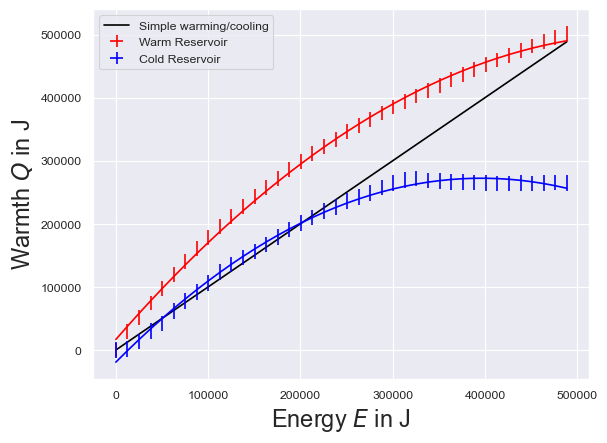

In [3]:
mass_red=4.28-0.32 #kg
mass_blue=4.52-0.34 #kg
mass_uncert=np.sqrt(2*0.01**2) #kg
temps_hot=[]
for i in range(40):
    temps_hot.append(abs(Temperatures["CHANNEL1"][60*i]-Temperatures["CHANNEL1"][0])*mass_red*4182)
temps_hot=np.array(temps_hot)


temps_cold=[]
for i in range(40):
    temps_cold.append(abs(Temperatures["CHANNEL5"][60*i]-Temperatures["CHANNEL5"][0])*mass_blue*4182)
temps_cold=np.array(temps_cold)

#for both temperatures
temp_err=np.sqrt(2*0.5**2)
temps_hot_uncert=np.sqrt((temp_err*mass_red*4182)**2) #+ (temps_hot*mass_uncert*4182)**2)
temps_cold_uncert=np.sqrt((temp_err*mass_blue*4182)**2) #+ (temps_cold*mass_uncert*4182)**2)


energy=Electric_energy["I(A)"]*Electric_energy["U(V)"]*60
all_energy=energy.sum()

energies=np.linspace(0, all_energy, 40)
energies_uncert=np.ones(40)*np.sqrt((0.1*60)**2 + (0.01*60)**2)

sns.set_theme(style="darkgrid")
sns.set_context("paper")
#plt.scatter(energies, temps_hot, marker="+", color="red", label="Warm Reservoir")
#plt.scatter(energies, temps_cold, marker="+", color="blue", label="Cold Reservoir")


def myfunction(x):
  return 1*x 
  #60 because we are actually having to work with the intervalls of 60 seconds

mymodel = list(map(myfunction, energies))
plt.plot(energies, mymodel, label="Simple warming/cooling", color="black")

model_hot = np.poly1d(np.polyfit(energies, temps_hot, 2))
plt.errorbar(energies, temps_hot, yerr=temps_hot_uncert, xerr=energies_uncert, color="red", label="Warm Reservoir", fmt="None")
plt.plot(energies, model_hot(energies), color="red")

eff_coef_hot=[model_hot(energies[5])/energies[5],
              model_hot(energies[15])/energies[15],
              model_hot(energies[35])/energies[35]]

model_cold = np.poly1d(np.polyfit(energies, temps_cold, 2))
plt.errorbar(energies, temps_cold, yerr=temps_cold_uncert, xerr=energies_uncert, color="blue", label="Cold Reservoir", fmt="None")
plt.plot(energies, model_cold(energies), color="blue")

eff_coef_cold=[model_cold(energies[5])/energies[5],
              model_cold(energies[15])/energies[15],
              model_cold(energies[35])/energies[35]]

#mymodel = list(map(myfunction2, energies))
#plt.plot(energies, mymodel, label="Simple cooling", color="cyan")

plt.xlabel("Energy $E$ in J", size=17)
plt.ylabel("Warmth $Q$ in J", size=17)
plt.legend()
#plt.savefig("Warmth_energy.png", dpi=500, bbox_inches="tight")
plt.show()

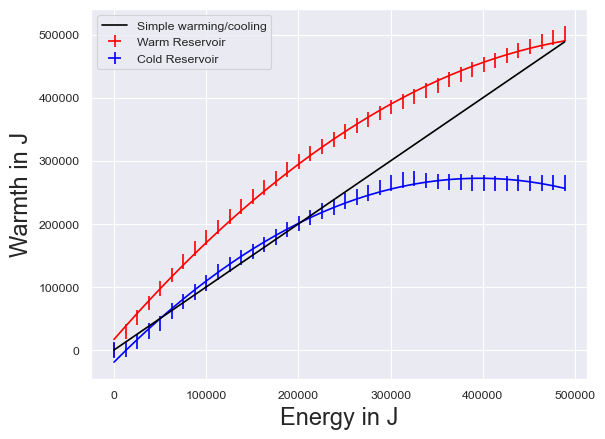

In [14]:
mass_uncert=np.sqrt(2*0.01**2) #kg
mass_red=ufloat(4.28-0.32, mass_uncert) #kg
mass_blue=ufloat(4.52-0.34, mass_uncert) #kg

temps_hot=[]
for i in range(40):
    temps_hot.append(abs(ufloat(Temperatures["CHANNEL1"][60*i]-Temperatures["CHANNEL1"][0], np.sqrt(2*0.5**2)))*mass_red*4182)
temps_hot=np.array(temps_hot)


temps_cold=[]
for i in range(40):
    temps_cold.append(abs(ufloat(Temperatures["CHANNEL5"][60*i]-Temperatures["CHANNEL5"][0], np.sqrt(2*0.5**2)))*mass_blue*4182)
temps_cold=np.array(temps_cold)

energies=np.linspace(0, all_energy, 40)
energy_uncert=np.sqrt((0.1*Electric_energy["I(A)"]*60)**2 + (0.01*Electric_energy["U(V)"]*60)**2)

energy_list=[]
for i in range(40):
    energy_list.append(ufloat(energies[i], energy_uncert[i]))
energy_list=np.array(energy_list)

sns.set_theme(style="darkgrid")
sns.set_context("paper")

plt.errorbar([energy_list[i].n for i in range(40)], [temps_hot[i].n for i in range(40)],
            yerr=[temps_hot[i].s for i in range(40)], xerr=[energy_list[i].s for i in range(40)],
            color="red", label="Warm Reservoir", fmt="None")
model_hot = np.poly1d(np.polyfit(energies, [temps_hot[i].n for i in range(40)], 2))
plt.plot(energies, model_hot(energies), color="red")

plt.errorbar([energy_list[i].n for i in range(40)], [temps_cold[i].n for i in range(40)],
            yerr=[temps_cold[i].s for i in range(40)], xerr=[energy_list[i].s for i in range(40)],
            color="blue", label="Cold Reservoir", fmt="None")
model_cold = np.poly1d(np.polyfit(energies, [temps_cold[i].n for i in range(40)], 2))
plt.plot(energies, model_cold(energies), color="blue")


mymodel = list(map(myfunction, energies))
plt.plot(energies, mymodel, label="Simple warming/cooling", color="black")
plt.xlabel("Energy in J", size=17)
plt.ylabel("Warmth in J", size=17)
plt.legend()
plt.savefig("Warmth_energy.png", dpi=500, bbox_inches="tight")
plt.show()


eff_coef_hot=[ufloat(model_hot(energies[5])/energies[5], 0.002*model_hot(energies[5])/energies[5]),
              ufloat(model_hot(energies[15])/energies[15], 0.002*model_hot(energies[15])/energies[15]),
              ufloat(model_hot(energies[35])/energies[35], 0.002*model_hot(energies[35])/energies[35])]


eff_coef_cold=[ufloat(model_cold(energies[5])/energies[5], 0.005*model_cold(energies[5])/energies[5]),
              ufloat(model_cold(energies[15])/energies[15], 0.005*model_cold(energies[15])/energies[15]),
              ufloat(model_cold(energies[35])/energies[35], 0.005*model_cold(energies[35])/energies[35])]


EX2 finding the effitiency coefficient through the Polynomial of 2. grade, already done in the previous excercise, with help of a polynomial fit - we simply found the rate of growth of a function at 5, 15, 35 minutes and use that as our 

In [5]:
eff_coef_hot

[1.8566715558774798+/-0.0037133431117549595,
 1.4957373745353593+/-0.0029914747490707183,
 1.0800705724147948+/-0.0021601411448295897]

In [6]:
eff_coef_cold

[1.0487979600145392+/-0.005243989800072696,
 1.0205672780834647+/-0.005102836390417324,
 0.6133358686822437+/-0.0030666793434112184]

In [7]:
from sklearn.metrics import r2_score
print(r2_score([temps_hot[i].n for i in range(40)], model_hot(energies)))
print(r2_score([temps_cold[i].n for i in range(40)], model_cold(energies)))


0.9981327899657384
0.995886027277814


Those results prove a very good fit, even though our data has a substantial difference in comparisson to expected values.

In [8]:
Array_1=np.array([Temperatures["CHANNEL1"][60*5], Temperatures["CHANNEL1"][15*60],
                    Temperatures["CHANNEL1"][60*35]])+273.15
Array_5=np.array([Temperatures["CHANNEL5"][60*5], Temperatures["CHANNEL5"][15*60],
                    Temperatures["CHANNEL5"][60*35]])+273.15
Array_0=np.array([Temperatures["CHANNEL0"][60*5], Temperatures["CHANNEL0"][15*60],
                    Temperatures["CHANNEL0"][60*35]])+273.15
Array_3=np.array([Temperatures["CHANNEL3"][60*5], Temperatures["CHANNEL3"][15*60],
                    Temperatures["CHANNEL3"][60*35]])+273.15
Array_2=np.array([Temperatures["CHANNEL2"][60*5], Temperatures["CHANNEL2"][15*60],
                    Temperatures["CHANNEL2"][60*35]])+273.15
Array_4=np.array([Temperatures["CHANNEL4"][60*5], Temperatures["CHANNEL4"][15*60],
                    Temperatures["CHANNEL4"][60*35]])+273.15
Array_6=np.array([Temperatures["CHANNEL6"][60*5], Temperatures["CHANNEL6"][15*60],
                    Temperatures["CHANNEL6"][60*35]])+273.15
Array_7=np.array([Temperatures["CHANNEL7"][60*5], Temperatures["CHANNEL7"][15*60],
                    Temperatures["CHANNEL7"][60*35]])+273.15
print(str(Array_0) +":0\n" + str(Array_3) +":3\n" + str(Array_2)  +":2\n" + str(Array_4)  +":4\n" + str(Array_6) +":6\n" + str(Array_7) + ":7")


[304.8396 316.1609 332.902 ]:0
[303.5412 313.2857 326.1611]:3
[299.6605 308.6579 317.9125]:2
[279.9968 273.9823 271.0791]:4
[281.0628 278.3748 271.9817]:6
[283.9611 279.3106 278.5366]:7


In [9]:
pressure_2=(np.array([6.6, 8.8, 12])*1E5 + 94872)*1E-6
pressure_4=(np.array([2.95, 2.20, 1.90])*1E5 + 94872)*1E-6
print(str(pressure_2) + "\n" + str(pressure_4)) #Pascal

[0.754872 0.974872 1.294872]
[0.389872 0.314872 0.284872]


In [10]:
Enthalpie_3=np.array([236.71, 250.11, 263.52]) #kJ/kg Point 3 for Temperature 2
Enthalpie_1=np.array([403.27, 402.33, 398.25])
Enthalpie_2=np.array([416.04, 420.27, 427.32])
Enthalpie_4=Enthalpie_3